## Setup

In [261]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df = pd.read_csv("../data_frame.csv")
df = df.rename(columns={
    "Unnamed: 0": "County",
    "Confirmed": "Confirmed Cases",
    "Active": "Active Cases",
    "Population Density (/mi^2)": "Population Density (persons/mi^2)",
    "Males per 100 Females": "Sex Ratio (males/100 females)"
})
df = df.drop(columns="County")
columns = list(df.columns)

## Correlation Matrix

We plot the correlation matrix to test for independence. Note some variables are not independent with each other.

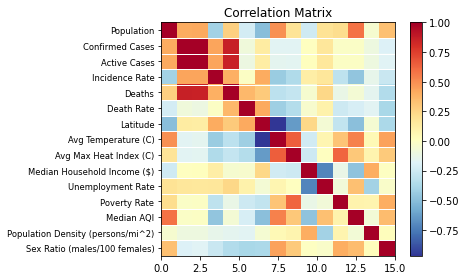

In [263]:
smg.plot_corr(np.corrcoef(df.T), ynames=columns)
plt.show()

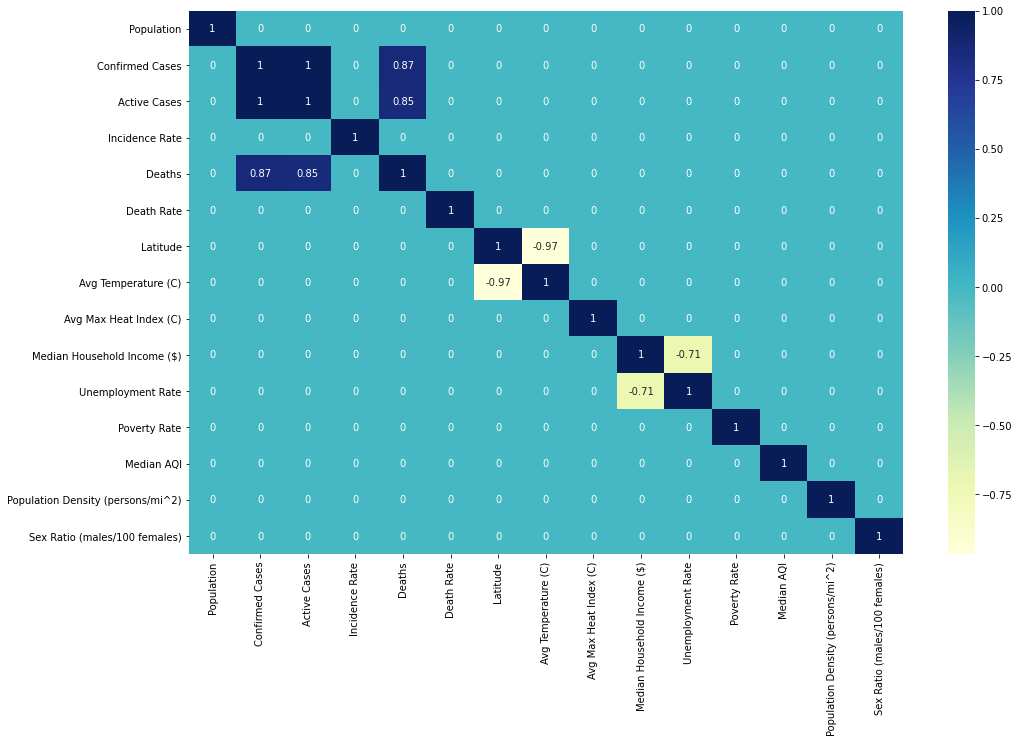

In [264]:
corr = df.corr()
corr
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

## Q-Q Plots

We then examine the Q-Q plots. Note most variables are in some need of regularization.

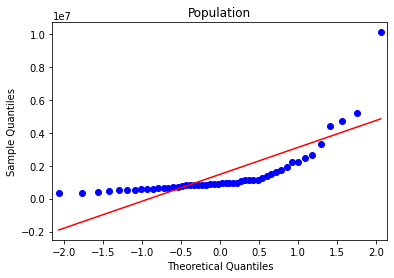

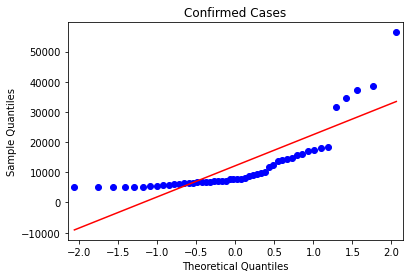

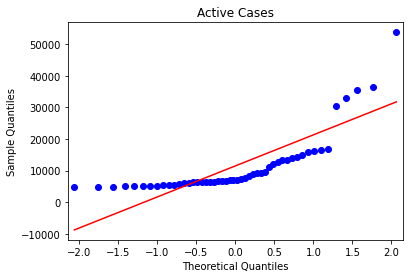

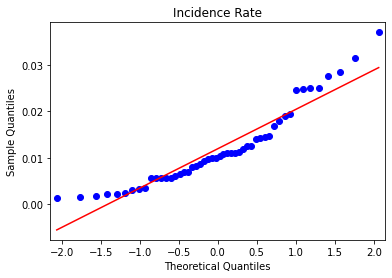

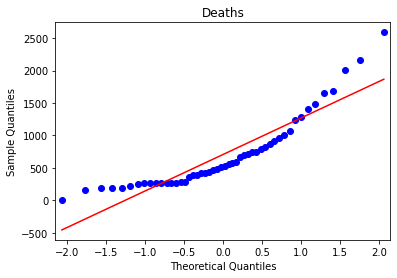

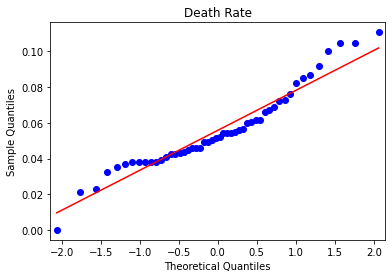

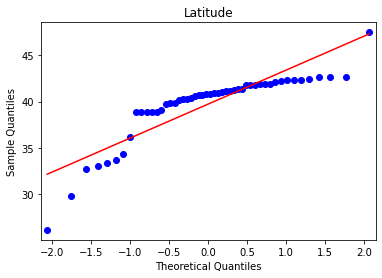

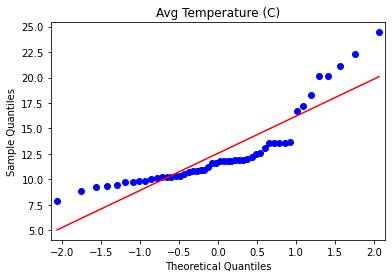

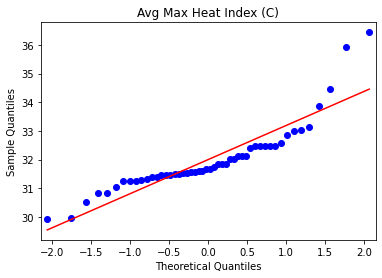

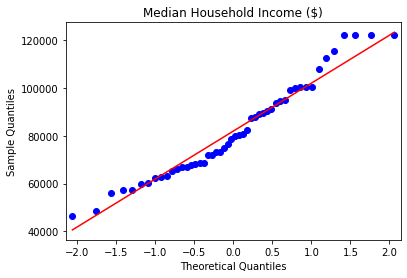

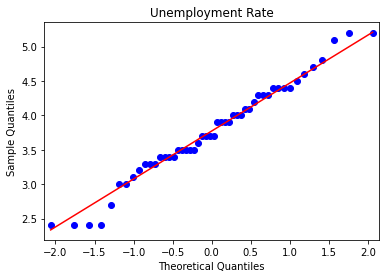

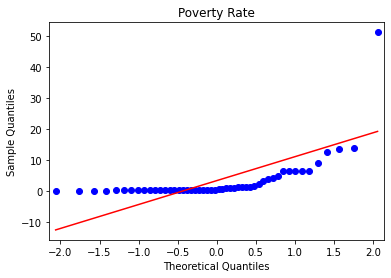

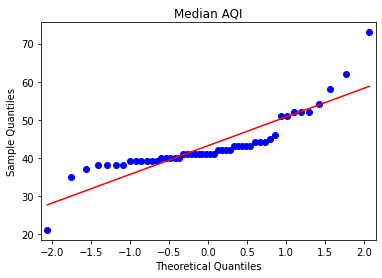

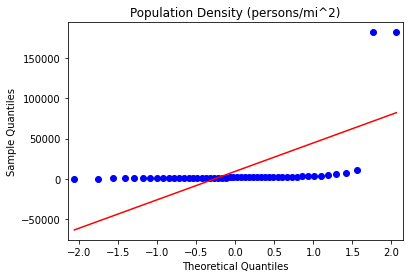

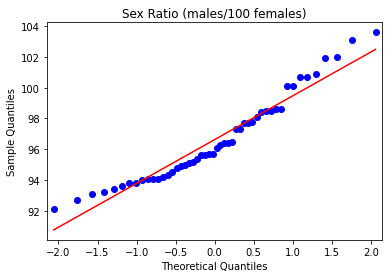

In [265]:
for column in df.columns:
    sm.qqplot(df[column], line='s')
    plt.title(column)
    plt.show()


## Multiple Linear Regressions (Unregularized and Regularized)

In [266]:
columns

['Population',
 'Confirmed Cases',
 'Active Cases',
 'Incidence Rate',
 'Deaths',
 'Death Rate',
 'Latitude',
 'Avg Temperature (C)',
 'Avg Max Heat Index (C)',
 'Median Household Income ($)',
 'Unemployment Rate',
 'Poverty Rate',
 'Median AQI',
 'Population Density (persons/mi^2)',
 'Sex Ratio (males/100 females)']

In [267]:
X1 = df.drop(columns=['Population', 'Confirmed Cases','Active Cases', 'Deaths', 'Death Rate','Latitude','Avg Max Heat Index (C)', 'Median Household Income ($)'])

X2 = df.drop(columns = ['Population', 'Confirmed Cases','Active Cases', 'Deaths', 'Incidence Rate','Latitude','Avg Max Heat Index (C)', 'Median Household Income ($)'])

Y1 = df["Death Rate"]
Y2 = df["Incidence Rate"]
model1 = sm.OLS(Y1, X1)
model2 = sm.OLS(Y2, X2)

### Death Rate (Unregularized)

In [268]:
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Death Rate   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              53.61
Date:                Fri, 15 May 2020   Prob (F-statistic):                    3.47e-19
Time:                        12:14:12   Log-Likelihood:                          126.50
No. Observations:                  50   AIC:                                     -239.0
Df Residuals:                      43   BIC:                                     -225.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Incidence Rate                       -0.9883      0.446     -2.216      0.032      -1.888      -0.089
Avg Temperature (C)                  -0.0027      0.001     -2.605      0.013      -0.005      -0.001
Unemployment Rate                     0.0082      0.005      1.584      0.120      -0.002       0.019
Poverty Rate                         -0.0007      0.000     -1.574      0.123      -0.002       0.000
Median AQI                           -0.0006      0.001     -1.153      0.255      -0.002       0.000
Population Density (persons/mi^2) -5.345e-08   9.08e-08     -0.588      0.559   -2.37e-07     1.3e-07
Sex Ratio (males/100 females)         0.0010      0.000      4.029      0.000       0.001       0.002
==============================================================================
Omnibus:                        7.478   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.854
Skew:                          -0.483   Prob(JB):                       0.0120
Kurtosis:                       4.821   Cond. No.                     5.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Incidence Rate (Unregularized)

In [269]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Incidence Rate   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                              27.76
Date:                Fri, 15 May 2020   Prob (F-statistic):                    5.47e-14
Time:                        12:14:12   Log-Likelihood:                          182.86
No. Observations:                  50   AIC:                                     -351.7
Df Residuals:                      43   BIC:                                     -338.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Death Rate                           -0.1037      0.047     -2.216      0.032      -0.198      -0.009
Avg Temperature (C)                  -0.0006      0.000     -1.737      0.090      -0.001    9.81e-05
Unemployment Rate                     0.0044      0.002      2.807      0.007       0.001       0.008
Poverty Rate                         -0.0003      0.000     -2.159      0.037      -0.001   -1.89e-05
Median AQI                           -0.0006      0.000     -3.489      0.001      -0.001      -0.000
Population Density (persons/mi^2) -7.093e-09   2.95e-08     -0.240      0.811   -6.66e-08    5.24e-08
Sex Ratio (males/100 females)         0.0004   8.29e-05      4.272      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.987   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.879
Skew:                           0.545   Prob(JB):                        0.144
Kurtosis:                       3.821   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF Filtering

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X, threshold=2.5):
    var = list(range(X.shape[1]))
    drop_col = []
    drop = True
    while drop:
        drop = False
        vif = [variance_inflation_factor(X.iloc[:, var].values, i)
               for i in range(X.iloc[:, var].shape[1])]
        maxLoc = vif.index(max(vif))
        if max(vif) > threshold:
            drop_col += [X.iloc[:, var].columns[maxLoc]]
            del var[maxLoc]
            drop = True
    return drop_col
    #return X.iloc[:, var]

In [281]:
X1 = df.drop(columns = ["Death Rate"])
drop = cal_vif(X1)
X1_clean = X1.drop(columns = drop)
model1_clean = sm.OLS(Y1, X1_clean)
model1_clean.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Death Rate   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              22.46
Date:                Fri, 15 May 2020   Prob (F-statistic):                    3.18e-11
Time:                        12:15:36   Log-Likelihood:                          100.92
No. Observations:                  50   AIC:                                     -191.8
Df Residuals:                      45   BIC:                                     -182.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Population                         2.782e-09   3.21e-09      0.868      0.390   -3.67e-09    9.24e-09
Incidence Rate                        1.4226      0.551      2.583      0.013       0.313       2.532
Deaths                             3.017e-05   1.09e-05      2.765      0.008    8.19e-06    5.22e-05
Poverty Rate                          0.0004      0.001      0.697      0.489      -0.001       0.002
Population Density (persons/mi^2)  9.084e-08   1.34e-07      0.677      0.502   -1.79e-07    3.61e-07
==============================================================================
Omnibus:                        3.338   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.482
Skew:                          -0.530   Prob(JB):                        0.289
Kurtosis:                       3.264   Cond. No.                     2.53e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
X2 = df.drop(columns = ["Incidence Rate"])
drop = cal_vif(X2)
drop
X2_clean = X2.drop(columns = drop)
model2_clean = sm.OLS(Y2, X2_clean)
model2_clean.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Incidence Rate   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              36.62
Date:                Fri, 15 May 2020   Prob (F-statistic):                    8.79e-15
Time:                        12:15:36   Log-Likelihood:                          180.73
No. Observations:                  50   AIC:                                     -351.5
Df Residuals:                      45   BIC:                                     -341.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Population                        -2.898e-09   6.62e-10     -4.376      0.000   -4.23e-09   -1.56e-09
Active Cases                       7.488e-07   1.04e-07      7.176      0.000    5.39e-07    9.59e-07
Death Rate                            0.1171      0.022      5.216      0.000       0.072       0.162
Poverty Rate                      -4.551e-05      0.000     -0.354      0.725      -0.000       0.000
Population Density (persons/mi^2)   4.01e-09   2.72e-08      0.147      0.884   -5.08e-08    5.88e-08
==============================================================================
Omnibus:                       11.356   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               23.905
Skew:                           0.466   Prob(JB):                     6.44e-06
Kurtosis:                       6.256   Cond. No.                     5.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
drop = cal_vif(df)
drop += ['Death Rate']
X3 = df.drop(columns = drop)
model3_i = sm.OLS(Y1, X3)
model3_i.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Death Rate   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              22.86
Date:                Fri, 15 May 2020   Prob (F-statistic):                    1.90e-10
Time:                        12:25:05   Log-Likelihood:                          96.997
No. Observations:                  50   AIC:                                     -186.0
Df Residuals:                      46   BIC:                                     -178.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Population                         8.165e-09   2.72e-09      2.998      0.004    2.68e-09    1.36e-08
Incidence Rate                        2.5902      0.378      6.851      0.000       1.829       3.351
Poverty Rate                          0.0003      0.001      0.487      0.628      -0.001       0.002
Population Density (persons/mi^2)  7.019e-08   1.43e-07      0.490      0.627   -2.18e-07    3.59e-07
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.321
Skew:                           0.012   Prob(JB):                        0.852
Kurtosis:                       2.608   Cond. No.                     1.62e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [286]:
drop = cal_vif(df)
drop += ['Incidence Rate']
X3 = df.drop(columns = drop)
model3_i = sm.OLS(Y2, X3)
model3_i.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Incidence Rate   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.540
Method:                 Least Squares   F-statistic:                              15.68
Date:                Fri, 15 May 2020   Prob (F-statistic):                    3.65e-08
Time:                        12:25:28   Log-Likelihood:                          161.66
No. Observations:                  50   AIC:                                     -315.3
Df Residuals:                      46   BIC:                                     -307.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Population                        -3.926e-10   8.15e-10     -0.482      0.632   -2.03e-09    1.25e-09
Death Rate                            0.1950      0.028      6.851      0.000       0.138       0.252
Poverty Rate                      -7.265e-05      0.000     -0.390      0.698      -0.000       0.000
Population Density (persons/mi^2)  3.205e-09   3.94e-08      0.081      0.936   -7.62e-08    8.26e-08
==============================================================================
Omnibus:                        7.990   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.271
Skew:                           0.905   Prob(JB):                       0.0264
Kurtosis:                       3.460   Cond. No.                     4.45e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Incidence Rate (Regularized)

In [65]:
#model2.fit_regularized(alpha=0.1, refit=True).summary()

Addressing Homeoscedasticity